### Разведывательный анализ данных

Задание:
Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы. Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 


Порядок выполнения задания:

- Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
- Посмотрите на распределение признака для числовых переменных, устраните выбросы.
- Оцените количество уникальных значений для номинативных переменных.
- По необходимости преобразуйте данные
- Проведите корреляционный анализ количественных переменных
- Отберите не коррелирующие переменные.
- Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
- Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

import matplotlib
plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [2]:
stud = pd.read_csv('stud_math.csv')
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

### Описание датасета:

- 1 school — аббревиатура школы, в которой учится ученик

- 2 sex — пол ученика ('F' - женский, 'M' - мужской)

- 3 age — возраст ученика (от 15 до 22)

- 4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

- 5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

- 6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

- 7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

- 8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

- 9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

- 10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

- 11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

- 12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

- 13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

- 14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

- 15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

- 16 schoolsup — дополнительная образовательная поддержка (yes или no)

- 17 famsup — семейная образовательная поддержка (yes или no)

- 18 paid — дополнительные платные занятия по математике (yes или no)

- 19 activities — дополнительные внеучебные занятия (yes или no)

- 20 nursery — посещал детский сад (yes или no)

- 21 higher — хочет получить высшее образование (yes или no)

- 22 internet — наличие интернета дома (yes или no)

- 23 romantic — в романтических отношениях (yes или no)

- 24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

- 25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

- 26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

- 27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

- 28 absences — количество пропущенных занятий

- 29 score — баллы по госэкзамену по математике

In [3]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [4]:
stud.columns = ['school', 'sex', 'age', 'address', 'fam_size', 'p_status', 'm_edu', 'f_edu',
       'm_job', 'f_job', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_g', 'higher', 'internet', 'romantic', 'fam_rel',
       'freetime', 'go_out', 'health', 'absences', 'score']

## Обработка и очистка таблицы
### Отсутствующие данные

In [5]:
# удаляем из выборки столбец 'studytime, granular', который я переименовал в 'studytime_g', 
# т.к. про него в задании ничего не сказано и непонятно что это такое

cols_to_drop = ['studytime_g']
stud = stud.drop(cols_to_drop, axis=1)

In [6]:
display(stud.head(10))
stud.info()

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,fam_rel,freetime,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   fam_size    368 non-null    object 
 5   p_status    350 non-null    object 
 6   m_edu       392 non-null    float64
 7   f_edu       371 non-null    float64
 8   m_job       376 non-null    object 
 9   f_job       359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

In [7]:
# отбор числовых колонок

stud_numeric = stud.select_dtypes(include=[np.number])
numeric_cols = stud_numeric.columns.values
print(numeric_cols)

['age' 'm_edu' 'f_edu' 'traveltime' 'studytime' 'failures' 'fam_rel'
 'freetime' 'go_out' 'health' 'absences' 'score']


In [8]:
# отбор категориальных колонок

stud_non_numeric = stud.select_dtypes(exclude=[np.number])
non_numeric_cols = stud_non_numeric.columns.values
print(non_numeric_cols)

['school' 'sex' 'address' 'fam_size' 'p_status' 'm_job' 'f_job' 'reason'
 'guardian' 'schoolsup' 'famsup' 'paid' 'activities' 'nursery' 'higher'
 'internet' 'romantic']


In [9]:
# Создаем функцию по очистке категориальных признаков

def fix_cat(x):
    if pd.isnull(x):
        return x
    if x == 'nan':
        return None
    return x

In [10]:
# Процентный список пропущенных данных

for col in stud.columns:
    pct_missing = np.mean(stud[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

school - 0.0%
sex - 0.0%
age - 0.0%
address - 4.0%
fam_size - 7.0%
p_status - 11.0%
m_edu - 1.0%
f_edu - 6.0%
m_job - 5.0%
f_job - 9.0%
reason - 4.0%
guardian - 8.0%
traveltime - 7.0%
studytime - 2.0%
failures - 6.0%
schoolsup - 2.0%
famsup - 10.0%
paid - 10.0%
activities - 4.0%
nursery - 4.0%
higher - 5.0%
internet - 9.0%
romantic - 8.0%
fam_rel - 7.0%
freetime - 3.0%
go_out - 2.0%
health - 4.0%
absences - 3.0%
score - 2.0%


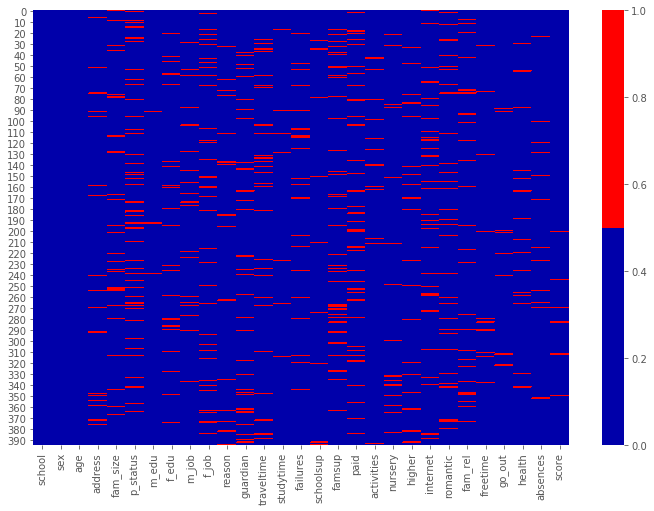

In [11]:
# Тепловая карта пропусков

cols = stud.columns
# определяем цвета
# красный - пропущенные данные, синий - не пропущенные
colours = ['#0000aa', '#ff0000']
sns.heatmap(stud[cols].isnull(), cmap=sns.color_palette(colours))

created missing indicator for: address
created missing indicator for: fam_size
created missing indicator for: p_status
created missing indicator for: m_edu
created missing indicator for: f_edu
created missing indicator for: m_job
created missing indicator for: f_job
created missing indicator for: reason
created missing indicator for: guardian
created missing indicator for: traveltime
created missing indicator for: studytime
created missing indicator for: failures
created missing indicator for: schoolsup
created missing indicator for: famsup
created missing indicator for: paid
created missing indicator for: activities
created missing indicator for: nursery
created missing indicator for: higher
created missing indicator for: internet
created missing indicator for: romantic
created missing indicator for: fam_rel
created missing indicator for: freetime
created missing indicator for: go_out
created missing indicator for: health
created missing indicator for: absences
created missing indicat

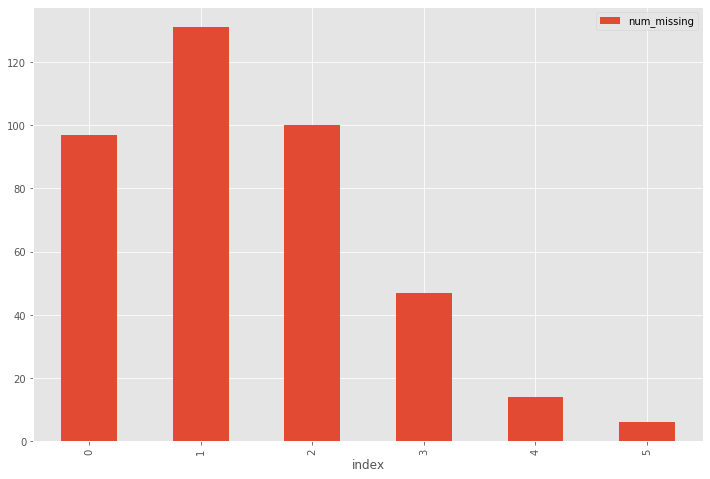

In [12]:
# гистограмма пропущенных данных

for col in stud.columns:
    missing = stud[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:
        print('created missing indicator for: {}'.format(col))
        stud['{}_ismissing'.format(col)] = missing

# затем на основе индикатора строим гистограмму

ismissing_cols = [col for col in stud.columns if 'ismissing' in col]
stud['num_missing'] = stud[ismissing_cols].sum(axis=1)

stud['num_missing'].value_counts().reset_index().sort_values(
    by='index').plot.bar(x='index', y='num_missing')

In [13]:
# Чуть меньше ста строк не имеют ни одного пропущенного значения.
# Около 130 строк имеют только одно пропущенное значение.
# Оставим эталонную таблицу в которой не больше 2х пропущенных значений в строке.
# отбрасываем строки с большим количеством пропусков

ind_missing = stud[stud['num_missing'] > 1].index
stud = stud.drop(ind_missing, axis=0)
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 1 to 393
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   school                228 non-null    object 
 1   sex                   228 non-null    object 
 2   age                   228 non-null    int64  
 3   address               225 non-null    object 
 4   fam_size              225 non-null    object 
 5   p_status              216 non-null    object 
 6   m_edu                 228 non-null    float64
 7   f_edu                 223 non-null    float64
 8   m_job                 221 non-null    object 
 9   f_job                 220 non-null    object 
 10  reason                226 non-null    object 
 11  guardian              219 non-null    object 
 12  traveltime            223 non-null    float64
 13  studytime             228 non-null    float64
 14  failures              228 non-null    float64
 15  schoolsup             2

In [14]:
# удаляем признаки для гистграммы пропущенных значений

for col in stud.columns:
    if 'missing' in col:
        del stud[col]
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 1 to 393
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      228 non-null    object 
 1   sex         228 non-null    object 
 2   age         228 non-null    int64  
 3   address     225 non-null    object 
 4   fam_size    225 non-null    object 
 5   p_status    216 non-null    object 
 6   m_edu       228 non-null    float64
 7   f_edu       223 non-null    float64
 8   m_job       221 non-null    object 
 9   f_job       220 non-null    object 
 10  reason      226 non-null    object 
 11  guardian    219 non-null    object 
 12  traveltime  223 non-null    float64
 13  studytime   228 non-null    float64
 14  failures    228 non-null    float64
 15  schoolsup   225 non-null    object 
 16  famsup      218 non-null    object 
 17  paid        215 non-null    object 
 18  activities  222 non-null    object 
 19  nursery     223 non-null    o

### score 
баллы по госэкзамену по математике. Главный столбец относительно которого мы исследуем влияние остальных критериев (признаков)

In [15]:
#Посмотрим содержимое столбца.

pd.DataFrame(stud.score.value_counts(dropna=False))

,score
55.0,31
50.0,29
40.0,21
0.0,20
65.0,18
75.0,17
70.0,16
60.0,16
45.0,16
30.0,10


Есть пропущенные значения.

count    227.000000
mean      51.916300
std       22.551947
min        0.000000
25%       40.000000
50%       55.000000
75%       65.000000
max      100.000000
Name: score, dtype: float64

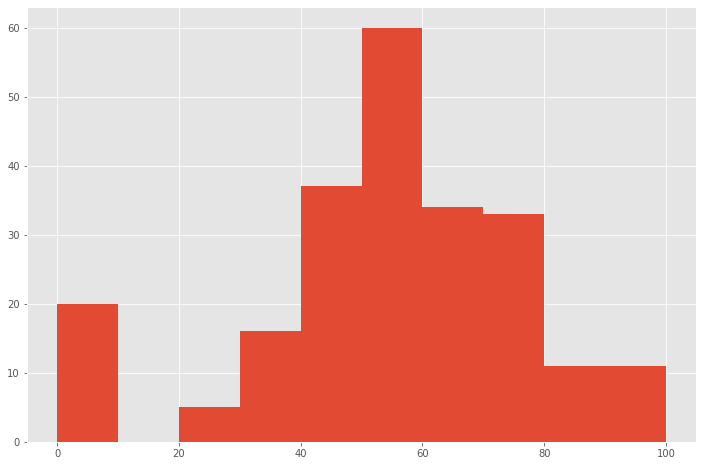

In [16]:
stud.score.hist()
stud.score.describe()

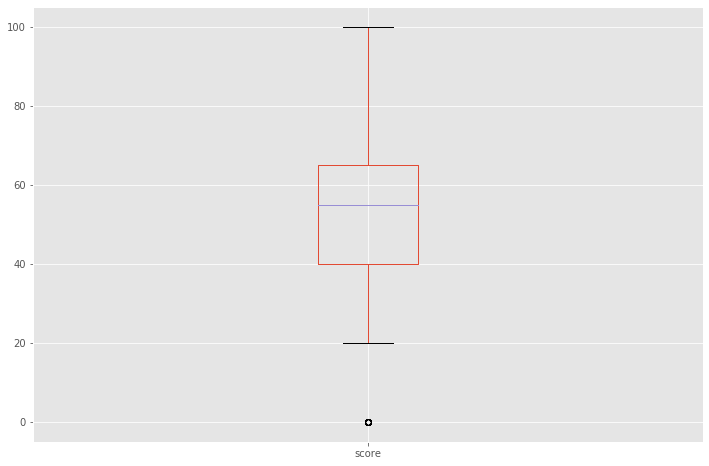

In [17]:
# уточняем на наличие выбросов

boxplot = stud.boxplot(column=['score'])

25й 40.0 75й 65.0 медиана= 55.0 IQR= 25.0 Разброс от 17.5 до 92.5


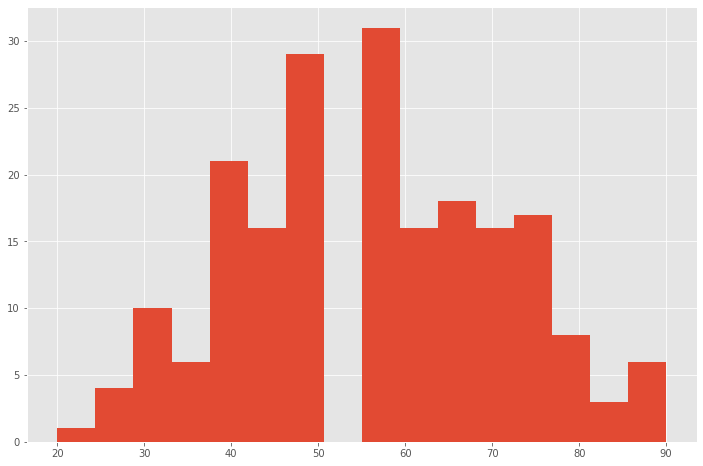

In [18]:
# удаляем выбросы

median_score = stud.score.median()
IQR_score = stud.score.quantile(0.75) - stud.score.quantile(0.25)
print('25й', stud.score.quantile(0.25), '75й', stud.score.quantile(0.75), 'медиана=', median_score, 'IQR=',
      IQR_score, 'Разброс от', median_score - 1.5*IQR_score, 'до', median_score + 1.5*IQR_score)
stud.score.loc[stud.score.between(
    median_score - 1.5*IQR_score, median_score + 1.5*IQR_score)].hist(bins=16, label='IQR')

In [19]:
# очищаем таблицу от выбросов

stud = stud.loc[stud.score.between(
    median_score - 1.5*IQR_score, median_score + 1.5*IQR_score)]
pd.DataFrame(stud.score.value_counts(dropna=False))

,score
55.0,31
50.0,29
40.0,21
65.0,18
75.0,17
70.0,16
60.0,16
45.0,16
30.0,10
80.0,8


### School
аббревиатура школы, в которой учится ученик

In [20]:
#Посмотрим, сколько школ содержит наш датасет.

pd.DataFrame(stud.school.value_counts(dropna=False))

,school
GP,177
MS,25


In [21]:
round(stud.school.value_counts(' ')*100, 1)

GP    87.6
MS    12.4
Name: school, dtype: float64

87.6% учеников учится в школе под кодовым именени GP. Остальные в MS

### Sex

In [22]:
# смотрим содержимое столбца

pd.DataFrame(stud.sex.value_counts(dropna=False))

,sex
F,114
M,88


In [23]:
round(stud.sex.value_counts(' ')*100, 1)

F    56.4
M    43.6
Name: sex, dtype: float64

Более половины (56.4%) учеников это девочки.

### Age

In [24]:
# смотрим содержимое столбца 

pd.DataFrame(stud.age.value_counts(dropna=False))

,age
16,57
17,54
18,43
15,36
19,9
20,2
22,1


Пропущенных значений нет, но возможно есть выбросы

count    202.000000
mean      16.717822
std        1.235696
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

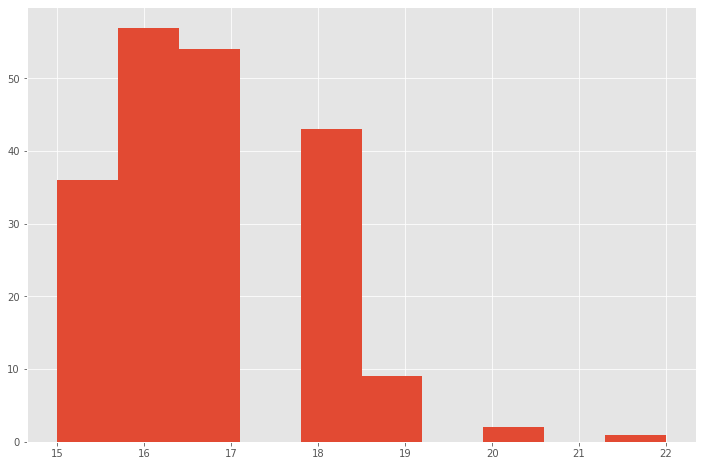

In [25]:
stud.age.hist()
stud.age.describe()

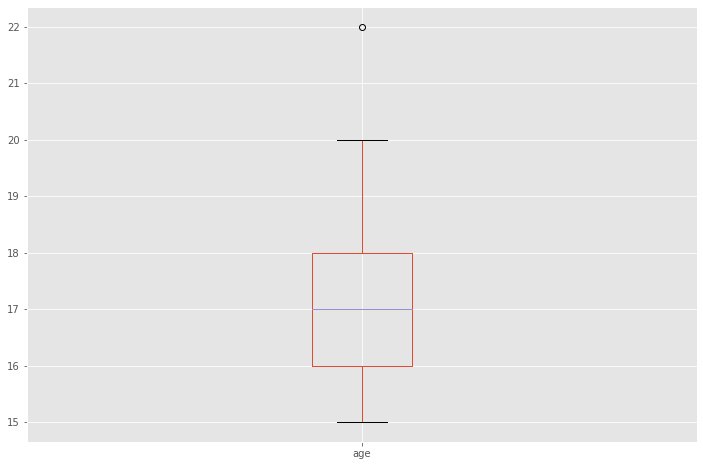

In [26]:
boxplot = stud.boxplot(column=['age'])

# присутствуют выбросы

In [27]:
# очистка от выбросов столбца age 

median_age = stud.age.median()
IQR_age = stud.age.quantile(0.75) - stud.age.quantile(0.25)
stud = stud.loc[stud.age.between(
    median_age - 1.5*IQR_age, median_age + 1.5*IQR_age)]
pd.DataFrame(stud.age.value_counts(dropna=False))

,age
16,57
17,54
18,43
15,36
19,9
20,2


In [28]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 1 to 393
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      201 non-null    object 
 1   sex         201 non-null    object 
 2   age         201 non-null    int64  
 3   address     199 non-null    object 
 4   fam_size    199 non-null    object 
 5   p_status    189 non-null    object 
 6   m_edu       201 non-null    float64
 7   f_edu       197 non-null    float64
 8   m_job       194 non-null    object 
 9   f_job       196 non-null    object 
 10  reason      199 non-null    object 
 11  guardian    194 non-null    object 
 12  traveltime  197 non-null    float64
 13  studytime   201 non-null    float64
 14  failures    201 non-null    float64
 15  schoolsup   198 non-null    object 
 16  famsup      193 non-null    object 
 17  paid        189 non-null    object 
 18  activities  195 non-null    object 
 19  nursery     198 non-null    o

### address
тип адреса ученика ('U' - городской, 'R' - за городом)

In [29]:
# смотрим содержимое столбца 

pd.DataFrame(stud.address.value_counts(dropna=False))

,address
U,157
R,42
NaN,2


In [31]:
# чистим содержимое столбца 

stud.address = stud.address.astype(str).apply(fix_cat)
pd.DataFrame(stud.address.value_counts(dropna=False))

,address
U,157
R,42
None,2


In [32]:
round(stud.address.value_counts(' ')*100, 1)

U       78.1
R       20.9
None     1.0
Name: address, dtype: float64

Большая часть учеников проживает в городе.

### fam_size
размер семьи('LE3' <= 3, 'GT3' >3)

Из предыдущего анализа в этом столбце у нас есть 7% пропущенных значений

In [33]:
# смотрим содержимое

pd.DataFrame(stud.fam_size.value_counts(dropna=False))

,fam_size
GT3,139
LE3,60
NaN,2


In [35]:
# обработаем пропущенные значения

stud.fam_size = stud.fam_size.astype(str).apply(fix_cat).sort_values()
pd.DataFrame(stud.fam_size.value_counts(dropna=False))

,fam_size
GT3,139
LE3,60
None,2


In [36]:
# считаем процентное соотношение

round(stud.fam_size.value_counts(' ')*100, 0)

GT3     69.0
LE3     30.0
None     1.0
Name: fam_size, dtype: float64

Большинство семей (69%) в выборке многодетные (от 4х детей), а 30% семей имеют до 3х детей.

### Pstatus
статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно).

In [37]:
# смотрим содержимое

pd.DataFrame(stud.p_status.value_counts(dropna=False))

,p_status
T,169
A,20
NaN,12


In [39]:
# обработаем пропущенные значения

stud.p_status = stud.p_status.astype(str).apply(fix_cat).sort_values()
pd.DataFrame(stud.p_status.value_counts(dropna=False))

,p_status
T,169
A,20
None,12


In [40]:
# считаем процентное соотношение

round(stud.p_status.value_counts(' ')*100, 1)

T       84.1
A       10.0
None     6.0
Name: p_status, dtype: float64

У 84.1% учеников родители проживают совместно, а у 10% - раздельно.

### Medu 
образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [41]:
# смотрим содержимое

pd.DataFrame(stud.m_edu.value_counts(dropna=False))

,m_edu
4.0,72
3.0,51
2.0,48
1.0,27
0.0,3


count    201.000000
mean       2.805970
std        1.112279
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: m_edu, dtype: float64

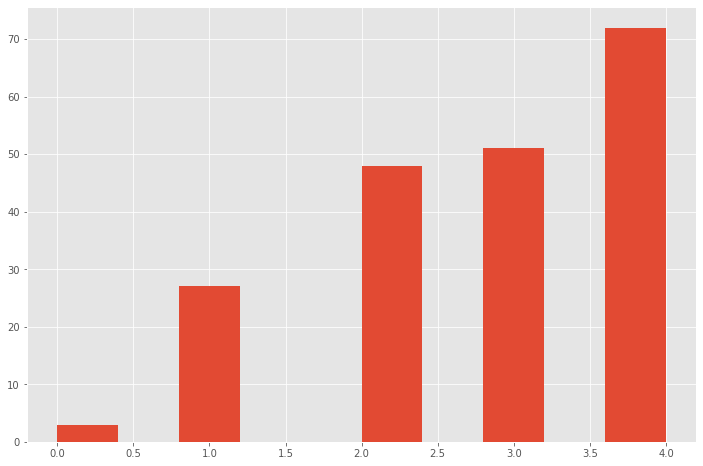

In [42]:
# посмотрим на распределение по категориям

stud.m_edu.hist()
stud.m_edu.describe()

In [43]:
# считаем процентное соотношение

round(stud.m_edu.value_counts(' ')*100, 1)

4.0    35.8
3.0    25.4
2.0    23.9
1.0    13.4
0.0     1.5
Name: m_edu, dtype: float64

Выбросов в выборке нет.

### Fedu 
образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [44]:
# смотрим содержимое

pd.DataFrame(stud.f_edu.value_counts(dropna=False))

,f_edu
2.0,57
3.0,52
4.0,50
1.0,37
NaN,4
40.0,1


count    197.000000
mean       2.776650
std        2.869769
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       40.000000
Name: f_edu, dtype: float64

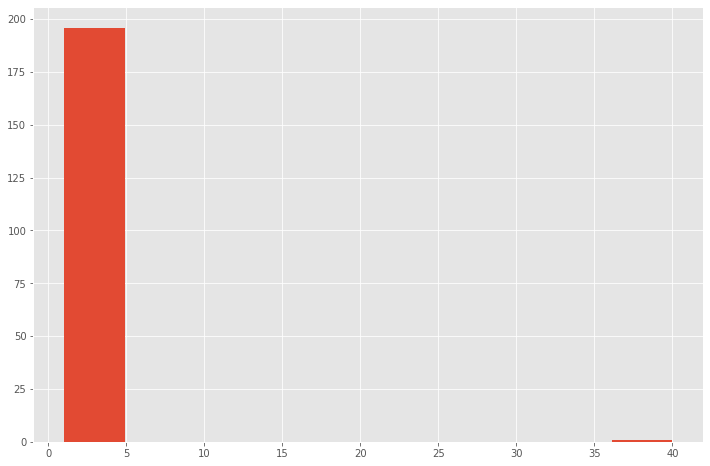

In [45]:
# посмотрим на распределение по категориям

stud.f_edu.hist()
stud.f_edu.describe()

В выбранном столбце явно присутствуют выбросы. Для их удаления "включаем здравый смысл" как в примере перед заданием.

In [46]:
# уберем строки со значением NaN и выбросы

stud = stud.loc[stud.f_edu <= 4]
pd.DataFrame(stud.f_edu.value_counts(dropna=False))

,f_edu
2.0,57
3.0,52
4.0,50
1.0,37


In [47]:
# смотрим процентное соотношение

round(stud.f_edu.value_counts(' ')*100, 1)

2.0    29.1
3.0    26.5
4.0    25.5
1.0    18.9
Name: f_edu, dtype: float64

### Mjob
работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [48]:
# смотрим содержимое столбца

pd.DataFrame(stud.m_job.value_counts(dropna=False))

,m_job
other,69
services,50
at_home,28
teacher,26
health,16
NaN,7


In [50]:
# обработаем пропущенные значения

stud.m_job = stud.m_job.astype(str).apply(fix_cat).sort_values()
pd.DataFrame(stud.m_job.value_counts(dropna=False))

,m_job
other,69
services,50
at_home,28
teacher,26
health,16
None,7


In [51]:
# строим процентное соотношение

round(stud.m_job.value_counts(' ')*100, 1)

other       35.2
services    25.5
at_home     14.3
teacher     13.3
health       8.2
None         3.6
Name: m_job, dtype: float64

### Fjob 
работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [52]:
# смотрим содержимое столбца

pd.DataFrame(stud.f_job.value_counts(dropna=False))

,f_job
other,104
services,52
teacher,17
health,10
at_home,8
NaN,5


In [54]:
# обработаем пропущенные значения

stud.f_job = stud.f_job.astype(str).apply(fix_cat).sort_values()
pd.DataFrame(stud.f_job.value_counts(dropna=False))

,f_job
other,104
services,52
teacher,17
health,10
at_home,8
None,5


In [55]:
# сторим процентное соотношение

round(stud.f_job.value_counts(' ')*100, 1)

other       53.1
services    26.5
teacher      8.7
health       5.1
at_home      4.1
None         2.6
Name: f_job, dtype: float64

### reason
причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [56]:
# смотрим содержимое столбца

pd.DataFrame(stud.reason.value_counts(dropna=False))

,reason
course,64
reputation,59
home,52
other,19
NaN,2


In [58]:
# обработаем пропущенные значения

stud.reason = stud.reason.astype(str).apply(fix_cat).sort_values()
pd.DataFrame(stud.reason.value_counts(dropna=False))

,reason
course,64
reputation,59
home,52
other,19
None,2


In [59]:
# сторим процентное соотношение

round(stud.reason.value_counts(' ')*100, 1)

course        32.7
reputation    30.1
home          26.5
other          9.7
None           1.0
Name: reason, dtype: float64

Ключевыми признаками выбора школы являлись: программа (32.7%) и репутация (по 30.1%)

### guardian 
опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [60]:
# смотрим содержимое столбца

pd.DataFrame(stud.guardian.value_counts(dropna=False))

,guardian
mother,132
father,43
other,14
NaN,7


In [62]:
# обработаем пропущенные значения

stud.guardian = stud.guardian.astype(str).apply(fix_cat).sort_values()
pd.DataFrame(stud.guardian.value_counts(dropna=False))

,guardian
mother,132
father,43
other,14
None,7


In [63]:
# сторим процентное соотношение

round(stud.guardian.value_counts(' ')*100, 1)

mother    67.3
father    21.9
other      7.1
None       3.6
Name: guardian, dtype: float64

Большая часть опекунов являются матери. Значение столбца не вполне понятно, очевидно, это тот кто каждый день занимается с ребенком по вопросам обучения. Неточности перевода и культурные различия.

### traveltime 
время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [64]:
# смотрим содержимое столбца

pd.DataFrame(stud.traveltime.value_counts(dropna=False))

,traveltime
1.0,126
2.0,50
3.0,12
4.0,4
NaN,4


In [66]:
# обработаем пропущенные значения

stud.traveltime = stud.traveltime.astype(str).apply(fix_cat).sort_values()
pd.DataFrame(stud.traveltime.value_counts(dropna=False))

,traveltime
1.0,126
2.0,50
3.0,12
None,4
4.0,4


In [67]:
# сторим процентное соотношение

round(stud.traveltime.value_counts(' ')*100, 1)

1.0     64.3
2.0     25.5
3.0      6.1
None     2.0
4.0      2.0
Name: traveltime, dtype: float64

Подавляющее большинство детей добирается до школы менее, чем за 15 минут. Следующий интервал (от 15-30 минут). Однако есть дети которые тратят более часа на то, чтобы добраться в школу.

### studytime 
время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [68]:
# смотрим содержимое столбца

pd.DataFrame(stud.studytime.value_counts(dropna=False))

,studytime
2.0,101
1.0,48
3.0,31
4.0,16


In [69]:
# обработаем пропущенные значения

stud.studytime = stud.studytime.astype(str).apply(fix_cat).sort_values()
pd.DataFrame(stud.studytime.value_counts(dropna=False))

,studytime
2.0,101
1.0,48
3.0,31
4.0,16


In [70]:
# сторим процентное соотношение

round(stud.studytime.value_counts(' ')*100, 1)

2.0    51.5
1.0    24.5
3.0    15.8
4.0     8.2
Name: studytime, dtype: float64

### failures 
количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

In [71]:
# смотрим содержимое столбца

pd.DataFrame(stud.failures.value_counts(dropna=False))

,failures
0.0,167
1.0,19
2.0,6
3.0,4


In [72]:
# сторим процентное соотношение

round(stud.failures.value_counts(' ')*100, 1)

0.0    85.2
1.0     9.7
2.0     3.1
3.0     2.0
Name: failures, dtype: float64

Большинство детей (85.2%) не испытывало внеучебных неудач (чтобы это не значило).

### schoolsup 
дополнительная образовательная поддержка (yes или no)

In [73]:
# смотрим содержимое столбца

pd.DataFrame(stud.schoolsup.value_counts(dropna=False))

,schoolsup
no,167
yes,26
NaN,3


In [75]:
# обработаем пропущенные значения

stud.schoolsup = stud.schoolsup.astype(str).apply(fix_cat).sort_values()
pd.DataFrame(stud.schoolsup.value_counts(dropna=False))

,schoolsup
no,167
yes,26
None,3


In [76]:
# сторим процентное соотношение

round(stud.schoolsup.value_counts(' ')*100, 1)

no      85.2
yes     13.3
None     1.5
Name: schoolsup, dtype: float64

Подавляющее большинство детей (85%) не пользовалось дополнительной образовательной поддержкой.

### famsup 
семейная образовательная поддержка (yes или no)

In [77]:
# смотрим содержимое столбца

pd.DataFrame(stud.famsup.value_counts(dropna=False))

,famsup
yes,124
no,64
NaN,8


In [79]:
# обработаем пропущенные значения

stud.famsup = stud.famsup.astype(str).apply(fix_cat).sort_values()
pd.DataFrame(stud.famsup.value_counts(dropna=False))

,famsup
yes,124
no,64
None,8


In [80]:
# сторим процентное соотношение

round(stud.famsup.value_counts(' ')*100, 1)

yes     63.3
no      32.7
None     4.1
Name: famsup, dtype: float64

Больше половины детей (63.3%) пользовались семейной образовательной поддержкой.

### paid
дополнительные платные занятия по математике (yes или no)

In [81]:
# смотрим содержимое столбца

pd.DataFrame(stud.paid.value_counts(dropna=False))

,paid
no,94
yes,90
NaN,12


In [83]:
# обработаем пропущенные значения

stud.paid = stud.paid.astype(str).apply(fix_cat).sort_values()
pd.DataFrame(stud.paid.value_counts(dropna=False))

,paid
no,94
yes,90
None,12


In [84]:
# сторим процентное соотношение

round(stud.paid.value_counts(' ')*100, 1)

no      48.0
yes     45.9
None     6.1
Name: paid, dtype: float64

### nursery 
посещал детский сад (yes или no)

In [85]:
# смотрим содержимое столбца

pd.DataFrame(stud.nursery.value_counts(dropna=False))

,nursery
yes,153
no,40
NaN,3


In [87]:
# обработаем пропущенные значения

stud.nursery = stud.nursery.astype(str).apply(fix_cat).sort_values()
pd.DataFrame(stud.nursery.value_counts(dropna=False))

,nursery
yes,153
no,40
None,3


In [88]:
# сторим процентное соотношение

round(stud.nursery.value_counts(' ')*100, 1)

yes     78.1
no      20.4
None     1.5
Name: nursery, dtype: float64

Подавляющее большинство детей (78.1%) посещало детский сад

### higher 
хочет получить высшее образование (yes или no)

In [89]:
# смотрим содержимое столбца

pd.DataFrame(stud.higher.value_counts(dropna=False))

,higher
yes,186
no,8
NaN,2


In [91]:
# обработаем пропущенные значения

stud.higher = stud.higher.astype(str).apply(fix_cat).sort_values()
pd.DataFrame(stud.higher.value_counts(dropna=False))

,higher
yes,186
no,8
None,2


In [92]:
# сторим процентное соотношение

round(stud.higher.value_counts(' ')*100, 1)

yes     94.9
no       4.1
None     1.0
Name: higher, dtype: float64

Подавляющее количество детей (94.9%) хочет получить высшее образование.

### internet 
наличие интернета дома (yes или no)

In [93]:
# смотрим содержимое столбца

pd.DataFrame(stud.internet.value_counts(dropna=False))

,internet
yes,159
no,28
NaN,9


In [95]:
# обработаем пропущенные значения

stud.internet = stud.internet.astype(str).apply(fix_cat).sort_values()
pd.DataFrame(stud.internet.value_counts(dropna=False))

,internet
yes,159
no,28
None,9


In [96]:
# сторим процентное соотношение

round(stud.internet.value_counts(' ')*100, 1)

yes     81.1
no      14.3
None     4.6
Name: internet, dtype: float64

У значительной части (81.1%) детей есть интернет дома. 

### romantic 
в романтических отношениях (yes или no)

In [97]:
# смотрим содержимое столбца

pd.DataFrame(stud.romantic.value_counts(dropna=False))

,romantic
no,125
yes,66
NaN,5


In [99]:
# обработаем пропущенные значения

stud.romantic = stud.romantic.astype(str).apply(fix_cat).sort_values()
pd.DataFrame(stud.romantic.value_counts(dropna=False))

,romantic
no,125
yes,66
None,5


In [100]:
# сторим процентное соотношение

round(stud.romantic.value_counts(' ')*100, 1)

no      63.8
yes     33.7
None     2.6
Name: romantic, dtype: float64

Только одна треть учеников (33.7%) состоит в романтических отношениях.

### famrel 
семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [101]:
# смотрим содержимое столбца

pd.DataFrame(stud.fam_rel.value_counts(dropna=False))

,fam_rel
4.0,93
5.0,48
3.0,32
2.0,9
NaN,8
1.0,5
-1.0,1


In [102]:
# очищаем таблицу согласно условия задачи

stud = stud.loc[stud.fam_rel >= 1]
pd.DataFrame(stud.fam_rel.value_counts(dropna=False))

,fam_rel
4.0,93
5.0,48
3.0,32
2.0,9
1.0,5


In [103]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 1 to 393
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      187 non-null    object 
 1   sex         187 non-null    object 
 2   age         187 non-null    int64  
 3   address     187 non-null    object 
 4   fam_size    187 non-null    object 
 5   p_status    187 non-null    object 
 6   m_edu       187 non-null    float64
 7   f_edu       187 non-null    float64
 8   m_job       187 non-null    object 
 9   f_job       187 non-null    object 
 10  reason      187 non-null    object 
 11  guardian    187 non-null    object 
 12  traveltime  187 non-null    object 
 13  studytime   187 non-null    object 
 14  failures    187 non-null    float64
 15  schoolsup   187 non-null    object 
 16  famsup      187 non-null    object 
 17  paid        187 non-null    object 
 18  activities  181 non-null    object 
 19  nursery     187 non-null    o

In [104]:
# сторим процентное соотношение

round(stud.fam_rel.value_counts(' ')*100, 1)

4.0    49.7
5.0    25.7
3.0    17.1
2.0     4.8
1.0     2.7
Name: fam_rel, dtype: float64

### activities
дополнительные внеучебные занятия (yes или no)

In [105]:
# смотрим содержимое столбца

pd.DataFrame(stud.activities.value_counts(dropna=False))

,activities
yes,91
no,90
NaN,6


In [108]:
# обработаем пропущенные значения

stud.activities = stud.activities.astype(str).apply(fix_cat).sort_values()
pd.DataFrame(stud.activities.value_counts(dropna=False))

,activities
yes,91
no,90
None,6


### freetime 
свободное время после школы (от 1 - очень мало до 5 - очень мого)

In [109]:
# смотрим содержимое столбца

pd.DataFrame(stud.freetime.value_counts(dropna=False))

,freetime
3.0,73
4.0,55
2.0,29
5.0,15
1.0,12
NaN,3


In [110]:
# очищаем таблицу согласно условия задачи

stud = stud.loc[stud.freetime > 0]
pd.DataFrame(stud.freetime.value_counts(dropna=False))

,freetime
3.0,73
4.0,55
2.0,29
5.0,15
1.0,12


In [111]:
# смотрим процентное соотношение

round(stud.freetime.value_counts(' ')*100, 1)

3.0    39.7
4.0    29.9
2.0    15.8
5.0     8.2
1.0     6.5
Name: freetime, dtype: float64

### goout 
проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [112]:
# смотрим содержимое столбца

pd.DataFrame(stud.go_out.value_counts(dropna=False))

,go_out
3.0,68
2.0,46
4.0,40
5.0,20
1.0,8
NaN,2


In [113]:
# очищаем таблицу согласно условия задачи

stud = stud.loc[stud.go_out > 0]
pd.DataFrame(stud.go_out.value_counts(dropna=False))

,go_out
3.0,68
2.0,46
4.0,40
5.0,20
1.0,8


In [114]:
# смотрим процентное соотношение

round(stud.go_out.value_counts(' ')*100, 1)

3.0    37.4
2.0    25.3
4.0    22.0
5.0    11.0
1.0     4.4
Name: go_out, dtype: float64

### health 
текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [115]:
# смотрим содержимое столбца

pd.DataFrame(stud.health.value_counts(dropna=False))

,health
5.0,54
3.0,44
4.0,34
2.0,23
1.0,23
NaN,4


In [116]:
# очищаем таблицу согласно условия задачи

stud = stud.loc[stud.health > 0]
pd.DataFrame(stud.health.value_counts(dropna=False))

,health
5.0,54
3.0,44
4.0,34
2.0,23
1.0,23


In [117]:
# смотрим процентное соотношение

round(stud.health.value_counts(' ')*100, 1)

5.0    30.3
3.0    24.7
4.0    19.1
2.0    12.9
1.0    12.9
Name: health, dtype: float64

### absences 
количество пропущенных занятий

In [118]:
# смотрим содержимое столбца

pd.DataFrame(stud.absences.value_counts(dropna=False))

,absences
0.0,37
4.0,28
2.0,28
6.0,15
10.0,10
8.0,10
14.0,6
16.0,5
3.0,5
12.0,4


In [119]:
# очищаем таблицу согласно условия задачи

stud = stud.loc[stud.absences >= 0]
pd.DataFrame(stud.absences.value_counts(dropna=False))

,absences
0.0,37
4.0,28
2.0,28
6.0,15
10.0,10
8.0,10
14.0,6
3.0,5
16.0,5
12.0,4


count    175.000000
mean       9.662857
std       33.409778
min        0.000000
25%        2.000000
50%        4.000000
75%        8.500000
max      385.000000
Name: absences, dtype: float64

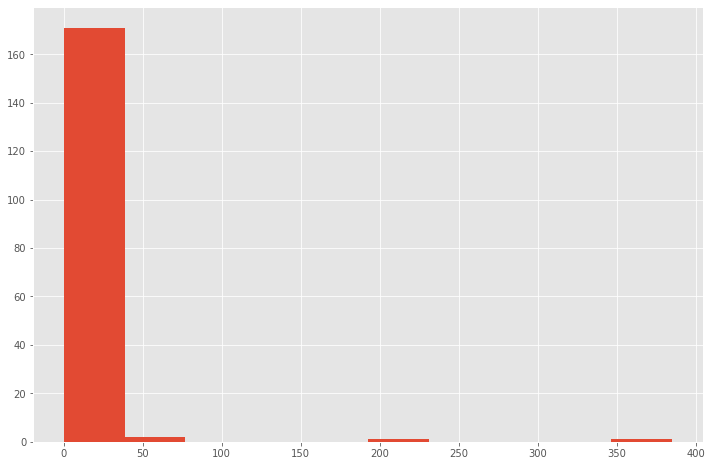

In [120]:
stud.absences.hist()
stud.absences.describe()

Самый простой способ отфильтровать выбросы — воспользоваться формулой интерквартильного расстояния. Напомним, что выбросом считаются такие значения, которые лежат вне рамок [median -1.5IQR : median+1.5IQR], где IQR = percentile(75) - percentile(25).

25й 2.0 75й 8.5 медиана= 4.0 IQR= 6.5 Разброс от -5.75 до 13.75


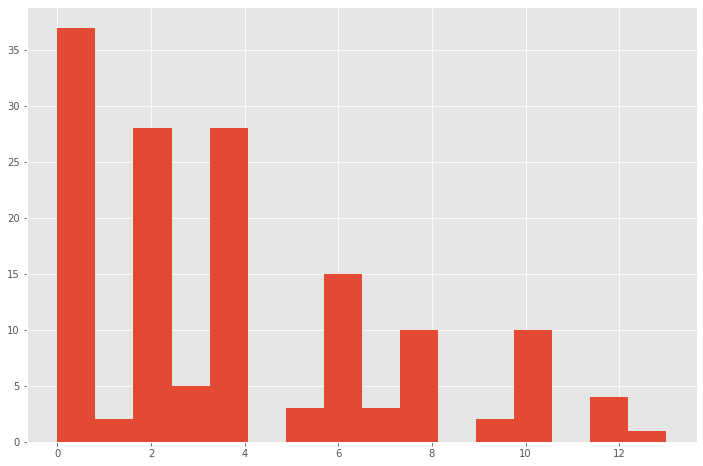

In [121]:
median_absences = stud.absences.median()
IQR_absences = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
print('25й', stud.absences.quantile(0.25), '75й', stud.absences.quantile(0.75), 'медиана=', median_absences, 'IQR=',
      IQR_absences, 'Разброс от', median_absences - 1.5*IQR_absences, 'до', median_absences + 1.5*IQR_absences)
stud.absences.loc[stud.absences.between(
    median_absences - 1.5*IQR_absences, median_absences + 1.5*IQR_absences)].hist(bins=16, label='IQR')

In [122]:
# очищаем таблицу от выбросов

stud = stud.loc[stud.absences.between(
    median_absences - 1.5*IQR_absences, median_absences + 1.5*IQR_absences)]
pd.DataFrame(stud.absences.value_counts(dropna=False))

,absences
0.0,37
2.0,28
4.0,28
6.0,15
8.0,10
10.0,10
3.0,5
12.0,4
5.0,3
7.0,3


In [123]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 1 to 393
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      148 non-null    object 
 1   sex         148 non-null    object 
 2   age         148 non-null    int64  
 3   address     148 non-null    object 
 4   fam_size    148 non-null    object 
 5   p_status    148 non-null    object 
 6   m_edu       148 non-null    float64
 7   f_edu       148 non-null    float64
 8   m_job       148 non-null    object 
 9   f_job       148 non-null    object 
 10  reason      148 non-null    object 
 11  guardian    148 non-null    object 
 12  traveltime  148 non-null    object 
 13  studytime   148 non-null    object 
 14  failures    148 non-null    float64
 15  schoolsup   148 non-null    object 
 16  famsup      148 non-null    object 
 17  paid        148 non-null    object 
 18  activities  148 non-null    object 
 19  nursery     148 non-null    o

### Корреляционный анализ
Корреляции рассмотрим только для числовых столбцов.

Используем для наглядности матрицу корреляций:

In [127]:
stud.corr()

,age,m_edu,f_edu,failures,fam_rel,freetime,go_out,health,absences,score
age,1.000000,-0.132167,-0.095081,0.150444,0.018953,-0.004465,-0.019579,0.032768,0.101261,-0.057951
m_edu,-0.132167,1.000000,0.694017,-0.192891,-0.007313,-0.039391,0.011588,-0.083606,0.108562,0.112294
f_edu,-0.095081,0.694017,1.000000,-0.182860,-0.018085,-0.017297,0.001045,-0.064701,0.081287,0.030756
failures,0.150444,-0.192891,-0.182860,1.000000,-0.115787,-0.032355,0.043221,0.117190,0.023328,-0.257708
fam_rel,0.018953,-0.007313,-0.018085,-0.115787,1.000000,0.129827,0.106085,0.077027,-0.062609,0.018134
freetime,-0.004465,-0.039391,-0.017297,-0.032355,0.129827,1.000000,0.305376,0.072096,0.048345,0.045732
go_out,-0.019579,0.011588,0.001045,0.043221,0.106085,0.305376,1.000000,0.034401,0.093634,-0.148173
health,0.032768,-0.083606,-0.064701,0.117190,0.077027,0.072096,0.034401,1.000000,-0.024448,-0.029977
absences,0.101261,0.108562,0.081287,0.023328,-0.062609,0.048345,0.093634,-0.024448,1.000000,-0.102800
score,-0.057951,0.112294,0.030756,-0.257708,0.018134,0.045732,-0.148173,-0.029977,-0.102800,1.000000


Самые слабоскоррелированные с показателем score переменные:
- уровень образования отца (f_edu), чем выше уровень образования отца, тем выше балл;
- здоровье (health), чем крепче здоровье, тем ниже балл;
- famrel — семейные отношения, чем лучше, тем выше балл;
- freetime — свободное время после школы, чем больше, тем выше балл.

### Анализ номинативных переменных
Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. Однако можно посмотреть, различаются ли распределения рейтинга в зависимости от значения этих переменных. 

Так как уникальных значений в столбцах достаточно много, будем брать в рассмотрение по, например, 30 самых частотных.

In [128]:
# номинативные переменные

print(non_numeric_cols)

['school' 'sex' 'address' 'fam_size' 'p_status' 'm_job' 'f_job' 'reason'
 'guardian' 'schoolsup' 'famsup' 'paid' 'activities' 'nursery' 'higher'
 'internet' 'romantic']


In [129]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

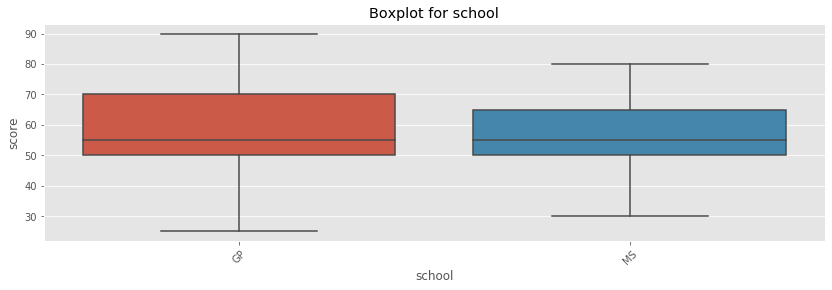

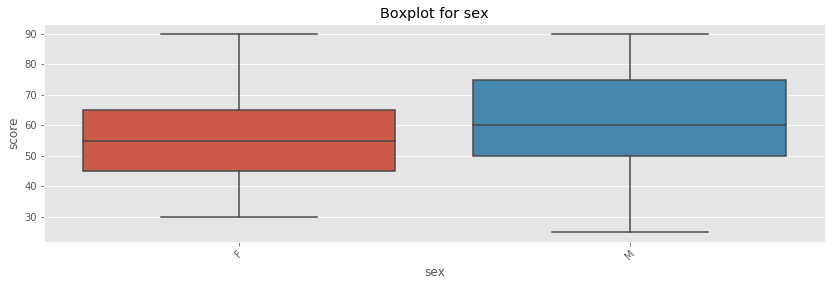

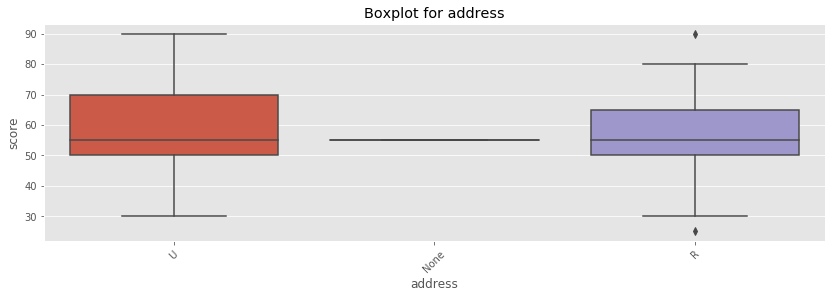

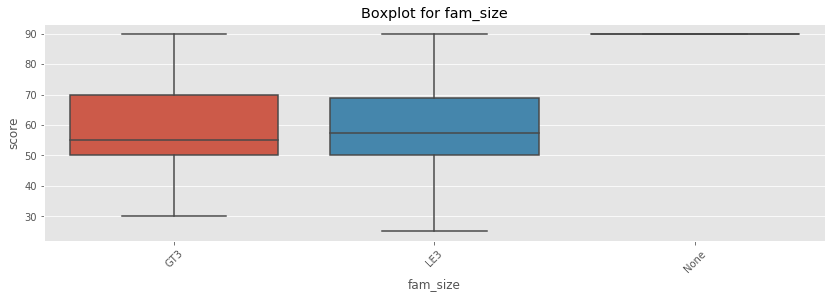

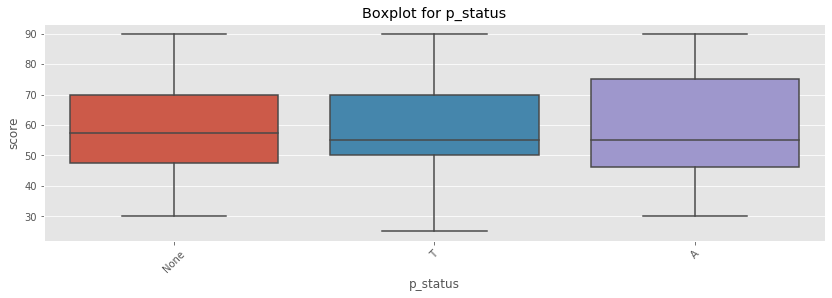

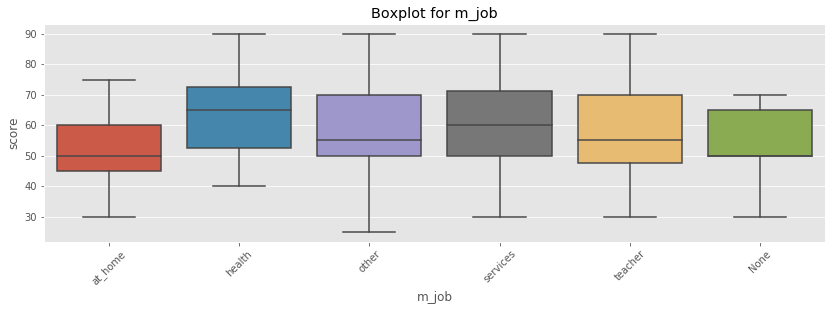

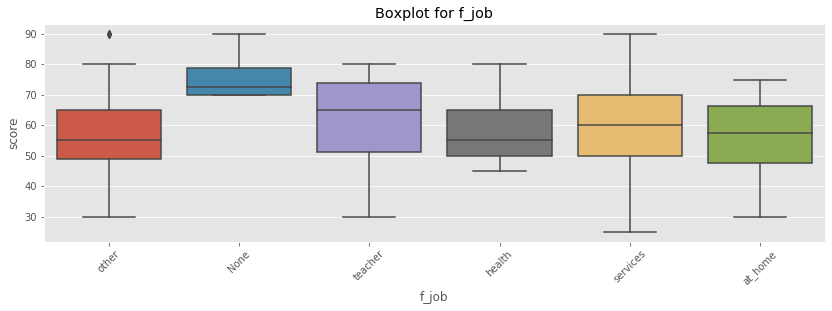

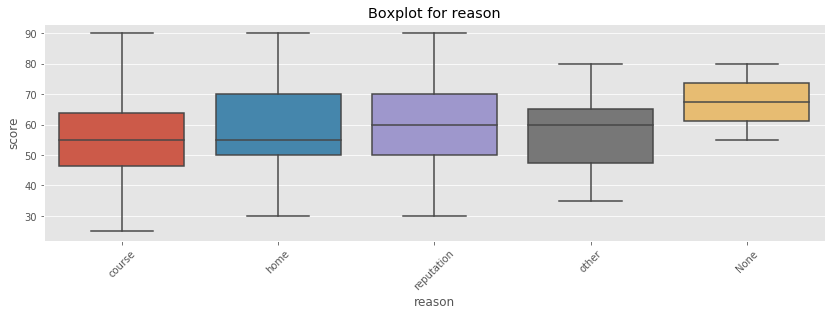

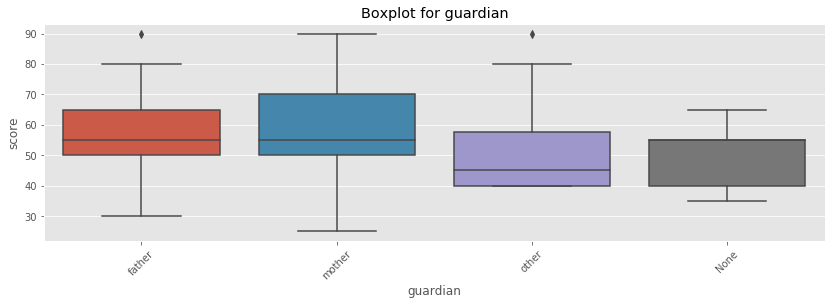

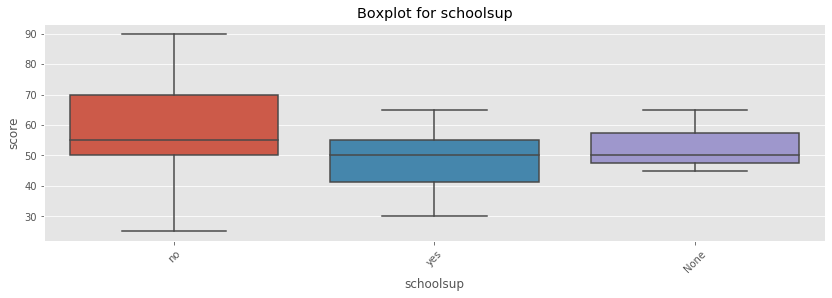

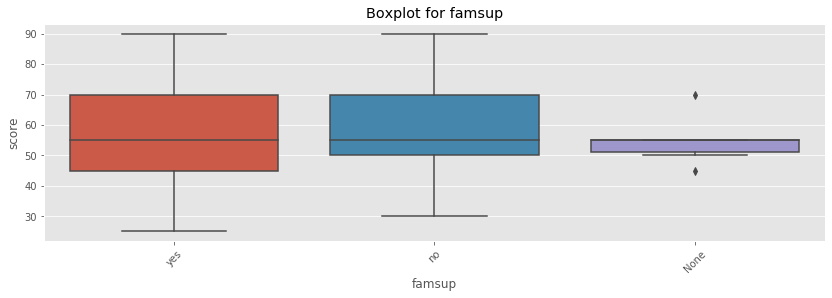

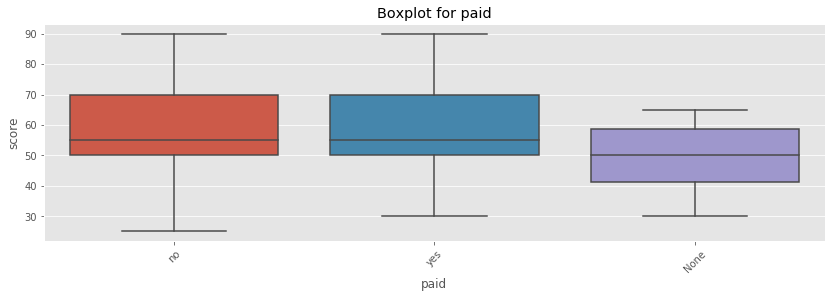

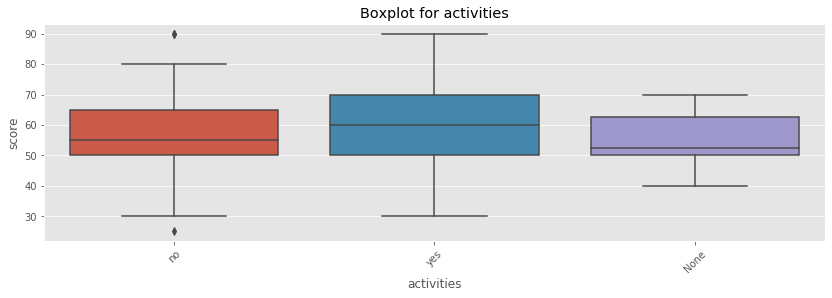

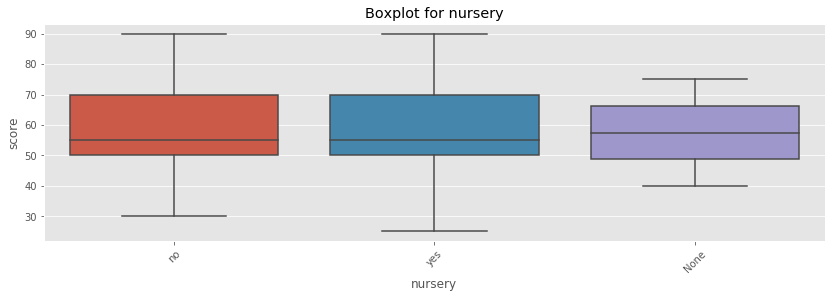

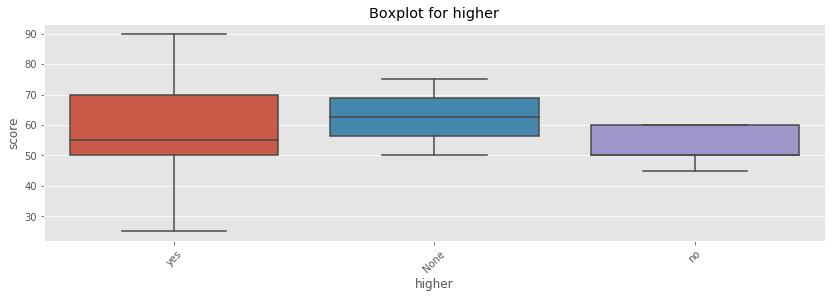

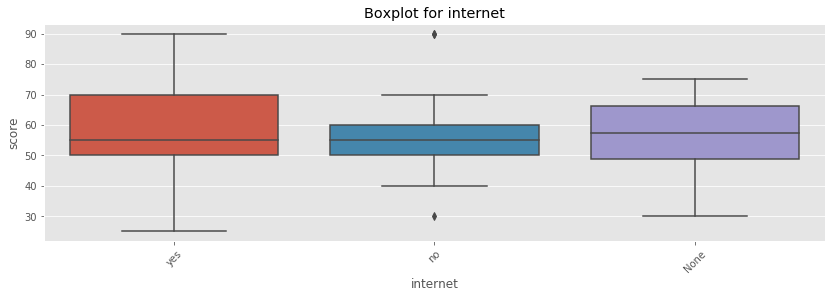

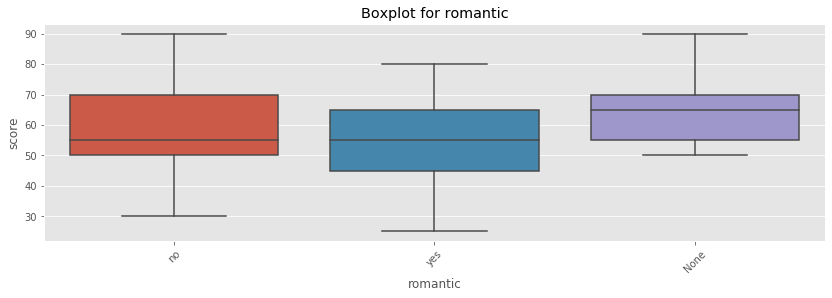

In [130]:
for col in ['school', 'sex', 'address', 'fam_size',
            'p_status', 'm_job', 'f_job', 'reason', 'guardian', 'schoolsup', 
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

По графикам похоже, что влияющие параметры: school, sex, fam_size, m_job, reason, higher, schoolsup

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок батончиков по различным параметрам неразличимы:

In [131]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [134]:
for col in ['school', 'sex', 'fam_size', 'm_job', 'f_job', 'reason', 'higher', 'schoolsup']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки schoolsup


Как мы видим, влияние на успех оказывают: sex - пол; schoolsup — дополнительная образовательная поддержка; f_edu - уровень образования отца; fam_rel - отношения в семье;	freetime - свободное время после школы;	health - здоровье; age - возраст.

Оставим эти переменные в датасете для дальнейшего построения модели.

In [135]:
stud_for_model = stud.loc[:, ['sex', 'schoolsup', 'age', 'f_edu', 'fam_rel', 'freetime', 'health']]
stud_for_model.head(10)

,sex,schoolsup,age,f_edu,fam_rel,freetime,health
1,F,no,17,1.0,5.0,3.0,3.0
3,F,no,15,2.0,3.0,2.0,5.0
4,F,no,16,3.0,4.0,3.0,5.0
5,M,no,16,3.0,5.0,4.0,5.0
6,M,no,16,2.0,4.0,4.0,3.0
7,F,yes,17,4.0,4.0,1.0,1.0
10,F,no,15,4.0,3.0,3.0,2.0
13,M,no,15,3.0,5.0,4.0,3.0
14,M,no,15,2.0,4.0,5.0,3.0
15,F,no,16,4.0,4.0,4.0,2.0


Выводы:
Итак, в результате EDA для анализа влияния жизни детей на экзаменационную оценку были получены следующие выводы:

- В данных достаточно мало пустых значений, столбец p_status был меньше всех заполнен значениями.
- Выбросы найдены только в столбцах с экзаменационными результатами (score), (age) - возраст  и (absences) - пропущенные занятия, что позволяет сделать вывод о том, что данные достаточно чистые.
- Положительная корреляция со (score) параметров уровня образования отца (f_edu), чем выше уровень образования отца, тем выше балл.
- Отрицательная корреляция со (score) параметров (health) — чем лучше здоровье, тем ниже балл; и (age) — чем старше, тем ниже балл.
- Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это sex - пол; schoolsup — дополнительная образовательная поддержка; f_edu - уровень образования отца; fam_rel - отношения в семье;	freetime - свободное время после школы;	health - здоровье; age - возраст.